In [72]:
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from docopt import docopt
import warnings
import logging
import itertools
import json
from tqdm import tqdm
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime

import warnings
import logging
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from docopt import docopt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

% matplotlib inline


# Supress warning in hmmlearn
warnings.filterwarnings("ignore")

In [2]:
extracted = ['GAIL', 'AXISBANK', 'M&M', 'ICICIBANK', 'HDFC', 'KOTAKBANK', 'LT', 'ADANIPORTS']
extracted = ['ASIANPAINT', 'HINDUNILVR', 'BAJAJFINSV', 'MARUTI', 'HDFCBANK', 'BAJFINANCE', 'BRITANNIA', 'HDFC', 'KOTAKBANK', 'INDUSINDBK']

In [61]:
main_dict={}

fn='INTRADAY_JSON/'+'NIFTY_7'+'.json'
f = open(fn)
lines = list(f)
lines = lines[0]
f.close()
data = json.loads(lines)
history_nifty = sorted(data['intraday'].items(), reverse=True)
history_nifty = history_nifty[::-1]

fn='INTRADAY_JSON/'+'GAIL_7'+'.json'
f = open(fn)
lines = list(f)
lines = lines[0]
f.close()
data = json.loads(lines)
history_gail = sorted(data['intraday'].items(), reverse=True)
main_dict['GAIL']=data['intraday']
history_gail =  history_gail[::-1]

fn='INTRADAY_JSON/'+'HDFC_7'+'.json'
f = open(fn)
lines = list(f)
lines = lines[0]
f.close()
data = json.loads(lines)
history_hdfc = sorted(data['intraday'].items(), reverse=True)
main_dict['HDFC']=data['intraday']
history_hdfc = history_hdfc[::-1]

In [62]:
for i in history_nifty:
    i[1]['close']=float(i[1]['close'])
    i[1]['open']=float(i[1]['open'])
    i[1]['high']=float(i[1]['high'])
    i[1]['low']=float(i[1]['low'])
    i[1]['volume']=float(i[1]['volume'])
    
for i in history_hdfc:
    i[1]['close']=float(i[1]['close'])
    i[1]['open']=float(i[1]['open'])
    i[1]['high']=float(i[1]['high'])
    i[1]['low']=float(i[1]['low'])
    i[1]['volume']=float(i[1]['volume'])
    
for i in history_gail:
    i[1]['close']=float(i[1]['close'])
    i[1]['open']=float(i[1]['open'])
    i[1]['high']=float(i[1]['high'])
    i[1]['low']=float(i[1]['low'])
    i[1]['volume']=float(i[1]['volume'])

In [12]:
main_history=[]
for i in tqdm(history_nifty):
    flag=0
    for j in ['HDFC', 'GAIL']:
        if i[0] not in main_dict[j]:
            flag=1
            break
    if flag==0:
        temp=[]
        temp.append(i[1]['close'])
        for j in ['HDFC', 'GAIL']:
            temp.append(main_dict[j][i[0]]['close'])
        main_history.append(temp)

100%|██████████| 2255/2255 [00:00<00:00, 316590.98it/s]


In [13]:
main_history

[['11831.10', '2043.75', '352.60'],
 ['11822.40', '2042.70', '352.45'],
 ['11819.95', '2040.35', '352.00'],
 ['11811.50', '2036.65', '351.20'],
 ['11816.00', '2039.35', '351.45'],
 ['11816.65', '2041.60', '350.85'],
 ['11819.15', '2043.90', '350.95'],
 ['11822.00', '2044.80', '351.60'],
 ['11824.15', '2047.40', '352.00'],
 ['11821.00', '2047.65', '351.75'],
 ['11818.00', '2045.35', '352.00'],
 ['11817.30', '2044.85', '351.85'],
 ['11821.20', '2046.60', '352.00'],
 ['11821.15', '2045.40', '351.95'],
 ['11822.35', '2043.95', '352.00'],
 ['11825.50', '2043.60', '352.35'],
 ['11825.10', '2042.20', '352.35'],
 ['11822.30', '2041.75', '351.90'],
 ['11815.25', '2041.00', '351.80'],
 ['11818.65', '2042.55', '351.05'],
 ['11819.30', '2042.05', '350.80'],
 ['11820.65', '2042.10', '350.10'],
 ['11814.30', '2042.60', '349.80'],
 ['11806.95', '2042.10', '349.70'],
 ['11805.15', '2041.40', '349.75'],
 ['11807.15', '2041.00', '349.55'],
 ['11803.75', '2038.05', '349.50'],
 ['11800.00', '2037.30', '34

In [14]:
history_nifty[0]

('2019-04-18 09:15:00',
 {'close': '11831.10',
  'high': '11856.15',
  'low': '11829.00',
  'open': '11856.15',
  'volume': '0'})





  0%|          | 0/23 [00:00<?, ?it/s]



  4%|▍         | 1/23 [00:03<01:16,  3.49s/it]



  9%|▊         | 2/23 [00:06<01:13,  3.49s/it]



 13%|█▎        | 3/23 [00:10<01:10,  3.55s/it]



 17%|█▋        | 4/23 [00:14<01:07,  3.53s/it]



 22%|██▏       | 5/23 [00:17<01:03,  3.52s/it]



 26%|██▌       | 6/23 [00:21<00:59,  3.51s/it]



 30%|███       | 7/23 [00:24<00:56,  3.50s/it]



 35%|███▍      | 8/23 [00:28<00:52,  3.49s/it]



 39%|███▉      | 9/23 [00:31<00:48,  3.49s/it]



 43%|████▎     | 10/23 [00:35<00:45,  3.48s/it]



 48%|████▊     | 11/23 [00:38<00:42,  3.50s/it]



 52%|█████▏    | 12/23 [00:42<00:38,  3.52s/it]



 57%|█████▋    | 13/23 [00:45<00:35,  3.50s/it]



 61%|██████    | 14/23 [00:49<00:31,  3.50s/it]



 65%|██████▌   | 15/23 [00:52<00:27,  3.49s/it]



 70%|██████▉   | 16/23 [00:56<00:24,  3.49s/it]



 74%|███████▍  | 17/23 [00:59<00:20,  3.48s/it]



 78%|███████▊  | 18/23 [01:02<00:17,  3.48s/it]



 83%|████████▎ | 19/23 [01:06<00:14,  3.61s/i

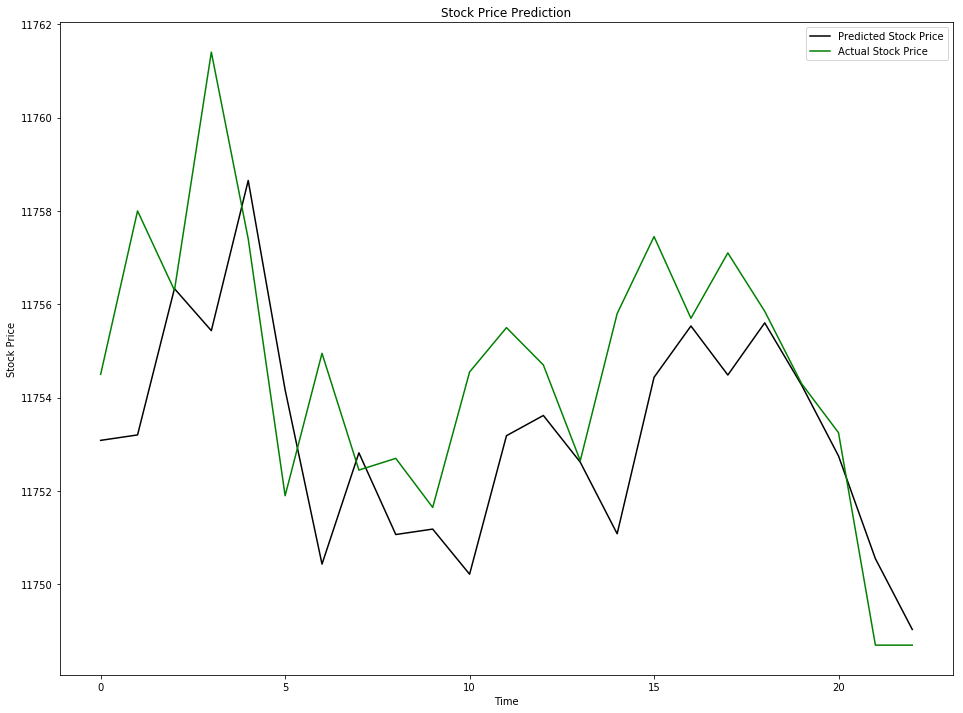

In [83]:
class StockPredictor(object):
    def __init__(self, test_size=0.01, n_hidden_states=4, n_latency_days=20, n_steps_frac_change=20, n_steps_frac_change1=20, n_steps_frac_change2=20):
#         self._init_logger()
        self.n_latency_days = n_latency_days
        self.n_hidden_states = n_hidden_states
        self.hmm = GaussianHMM(n_components=n_hidden_states)
        self._train_data, self._test_data = train_test_split(df, test_size=test_size, shuffle=False) 
        self._compute_all_possible_outcomes(n_steps_frac_change, n_steps_frac_change1, n_steps_frac_change2)
    
#     def _init_logger(self):
#         self._logger = logging.getLogger(__name__)
#         handler = logging.StreamHandler()
#         formatter = logging.Formatter('%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
#         handler.setFormatter(formatter)
#         self._logger.addHandler(handler)
#         self._logger.setLevel(logging.DEBUG)
                
    @staticmethod
    def _extract_features(data):
        open_price = np.array(data['open'])
        close_price = np.array(data['close'])
        low_price = np.array(data['low'])
        high_price = np.array(data['high'])
                
        temp_open = np.concatenate((np.array([open_price[0]]), open_price[:-1]), axis=0)
        temp_close = np.concatenate((np.array([open_price[0]]), close_price[:-1]), axis=0)
        temp_low = np.concatenate((np.array([open_price[0]]), low_price[:-1]), axis=0)
        temp_high = np.concatenate((np.array([open_price[0]]), high_price[:-1]), axis=0)
        
        frac_change = ((close_price - open_price) / open_price)[1:]
        frac_change1 = ((close_price - temp_close) / temp_close)[1:]
        frac_change2 = ((close_price - low_price) / low_price)[1:]

        return np.column_stack((frac_change, frac_change1, frac_change2))

    def fit(self):
#         self._logger.info('>>> Building Features')
        feature_vector = StockPredictor._extract_features(self._train_data)
#         self._logger.info('Features Extraction Completed <<<')
        self.hmm.fit(feature_vector)
 
    def _compute_all_possible_outcomes(self, n_steps_frac_change, n_steps_frac_change1, n_steps_frac_change2):
        frac_change_range = np.linspace(-0.005, 0.005, n_steps_frac_change)
        frac_change1_range = np.linspace(-0.005, 0.005, n_steps_frac_change1)
        frac_change2_range = np.linspace(-0.005, 0.005, n_steps_frac_change2)
 
        self._possible_outcomes = np.array(list(itertools.product(frac_change_range, frac_change1_range, frac_change2_range)))
        return
    
    def _get_most_probable_outcome(self, day_index):
        previous_data_start_index = max(0, len(self._train_data)-day_index-self.n_latency_days-1)
        previous_data_end_index = max(0, len(self._train_data)-day_index)
        previous_data = df.iloc[previous_data_start_index:previous_data_end_index]
        previous_data_features = StockPredictor._extract_features(previous_data)
 
        outcome_score = []
        for possible_outcome in self._possible_outcomes:
            total_data = np.row_stack((previous_data_features, possible_outcome))
            outcome_score.append(self.hmm.score(total_data))
            
        most_probable_outcome = self._possible_outcomes[np.argmax(outcome_score)]
 
        return most_probable_outcome
 
    def predict_open_price(self, day_index):
        predicted_frac_change, predicted_frac_change1, predicted_frac_change2 = self._get_most_probable_outcome(day_index)
        return (df['open'][(len(self._train_data)+day_index)]*(predicted_frac_change+1) + df['close'][(len(self._train_data)+day_index-1)]*(predicted_frac_change1+1) + df['low'][(len(self._train_data)+day_index)]*(predicted_frac_change2+1))/3
#                 +df['low'][(len(self._train_data)+day_index-1)]*(predicted_frac_change1+1)+df['high'][(len(self._train_data)+day_index-1)]*(predicted_frac_change2+1))/3
    
    def predict_open_prices_for_days(self, with_plot=False):
        predicted_open_prices = []
        for day_index in tqdm(range(len(self._test_data))):
#         for day_index in tqdm(range(10)):
            predicted_open_prices.append(self.predict_open_price(day_index))
        test_data = self._test_data
        actual_open_prices = test_data['close'].values
        
        plt.figure(figsize=(16,12))
        plt.plot(predicted_open_prices, color = 'black', label = 'Predicted Stock Price')
        plt.plot(actual_open_prices, color = 'green', label = 'Actual Stock Price')
        plt.title('Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()
#         plt.savefig('HMM_'+str(self.n_hidden_states)+'_'+str(self.n_latency_days)+'.png')
 
        return actual_open_prices, predicted_open_prices
 
stock_predictor = StockPredictor(n_hidden_states=12, n_latency_days=20)
stock_predictor.fit()
actual, predicted = stock_predictor.predict_open_prices_for_days()

In [82]:
x = [go.Scatter(y=actual, name='Actual'), go.Scatter(y=predicted, name='Predicted')]
py.iplot(x, filename = 'nifty-50')

In [63]:
df = pd.DataFrame(columns=['close', 'open', 'low', 'high'])
temp1,temp2, temp3, temp4 = [], [], [], []
for i in history_nifty:
    temp1.append(float(i[1]['close']))
    temp2.append(float(i[1]['open']))
    temp3.append(float(i[1]['low']))
    temp4.append(float(i[1]['high']))
    
df['close']=temp1
df['open']=temp2
df['low']=temp3
df['high']=temp4

In [5]:
len(history_gail), len(history_nifty), len(history_hdfc)

(2253, 2255, 2259)

In [8]:
history_nifty[-1], history_hdfc[-1], history_gail[-1]

(('2019-04-29 09:15:00',
  {'close': 11748.7,
   'high': 11754.4,
   'low': 11748.0,
   'open': 11753.5,
   'volume': 0.0}),
 ('2019-04-29 09:15:00',
  {'close': 1975.1,
   'high': 1978.0,
   'low': 1975.1,
   'open': 1977.0,
   'volume': 7643.0}),
 ('2019-04-29 09:15:00',
  {'close': 352.95,
   'high': 353.4,
   'low': 352.45,
   'open': 353.05,
   'volume': 12633.0}))

In [30]:
x = StandardScaler()
y = x.fit_transform(df.values)

In [34]:
s_df = pd.DataFrame(columns=['nifty', 'hdfc', 'gail'])
s_df['nifty']=y[:,0]
s_df['hdfc']=y[:,1]
s_df['gail']=y[:,2]

In [33]:
y[:,0]

array([2.28995382, 2.15610891, 2.11841695, ..., 1.09227262, 1.02227327,
       1.02227327])